## Coding Exercise #0303

### 1. Descriptive statistics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
# Read in the data.
df = pd.read_csv('data_studentlist.csv', header='infer')

In [4]:
print (df.shape)

(17, 8)


In [ ]:
#display the first 5 lines of the data 

In [8]:
print (df.head(5))

              name gender  age  grade absence bloodtype  height  weight
0    Jared Diamond      M   23      3       Y         O   165.3    68.2
1   Sarah O'Donnel      F   22      2       N        AB   170.1    53.0
2     Brian Martin      M   24      4       N         B   175.0    80.1
3     David Hassel      M   23      3       N        AB   182.1    85.7
4  Clara Rodriquez      F   20      1       Y         A   168.0    49.5


#### 1.1. Sample statistics:

calculate the mean of height

In [29]:
mean = df['height'].mean()
print (mean)

170.03529411764703



Question : ge the unbiased estimator of the variance (i.e divided by $n-1$). (hint-1 : read the documentation of ``var`` )




hint-2 : A statistic d is called an unbiased estimator for a function of the parameter g(θ) provided that for every choice of θ, Eθd(X) = g(θ). Any estimator that not unbiased is called biased. The bias is the difference bd(θ) = Eθd(X) − g(θ). We can assess the quality of an estimator by computing its mean square error.

In statistics, the bias of an estimator is the difference between this estimator's expected value and the true value of the parameter being estimated. An estimator or decision rule with zero bias is called unbiased. In statistics, "bias" is an objective property of an estimator



Documentation:


https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/a/unbiased-estimate-of-population-variance


http://stat88.org/textbook/notebooks/Chapter_05/04_Unbiased_Estimators.html


In [4]:
# Unbiased estimator of the variance.


Delta Degrees of Freedom: the divisor used in the calculation is N - ddof, where N represents the number of elements. By default, ddof is zero.

The mean is normally calculated as x.sum() / N, where N = len(x). If, however, ddof is specified, the divisor N - ddof is used instead.

In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of a hypothetical infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables.


Run the following code!! What is the difference between ddof=0 and ddof =1

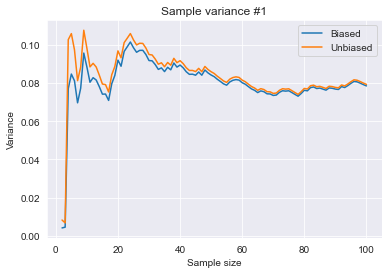

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

n = 100
rands = np.random.rand(n)
biased = []
unbiased = []
for i in range(2, n+1):
  biased.append(np.var(rands[:i], ddof=0))
  unbiased.append(np.var(rands[:i], ddof=1))

x = np.arange(2, n+1)
plt.plot(x, biased, label="Biased")
plt.plot(x, unbiased, label="Unbiased")
plt.xlabel("Sample size")
plt.ylabel("Variance")
plt.legend()
plt.title("Sample variance #1");

same as the above but with std 

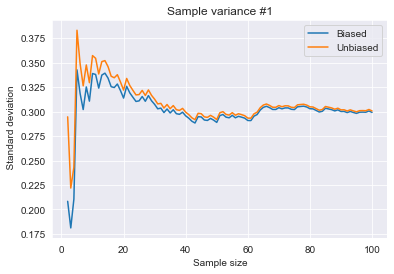

In [3]:
# Unbiased estimator of the standard deviation.
n = 100
rands = np.random.rand(n)
biased = []
unbiased = []
for i in range(2, n+1):
  biased.append(np.std(rands[:i], ddof=0))
  unbiased.append(np.std(rands[:i], ddof=1))

x = np.arange(2, n+1)
plt.plot(x, biased, label="Biased")
plt.plot(x, unbiased, label="Unbiased")
plt.xlabel("Sample size")
plt.ylabel("Standard deviation")
plt.legend()
plt.title("Sample variance #1");

calculate the : mean , median , min and max of the ``height`` column

In [8]:
# Median.
df = pd.read_csv('data_studentlist.csv', header='infer')
median = df['height'].median()
print (f'median = ', median)
min = df['height'].min()
print (f'min = ', min)
max = df['height'].max()
print (f'max = ', max)


median =  169.2
min =  155.2
max =  182.1


get the quantile at $alpha = 0.1$ (hint : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)

In [9]:
# Quantile at alpha = 0.1
df['height'].quantile(0.1)

160.48

same as the above but with $alpha = 0.9$

In [10]:
# Quantile at alpha = 0.9
df['height'].quantile(0.9)

179.1

#### 1.2. Boxplot: 

Documentation:

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review

Use what you've learned to calculate the inter quantile range using its forumla (hint : dataframe.quantile), and use the percentage 25% and 75%.

In [11]:
# The Inter Quartile Range
df['height'].quantile(0.75)-df['height'].quantile(0.25)

10.799999999999983

plot the box plot of ``height`` and ``weight`` using seaborn

<AxesSubplot:>

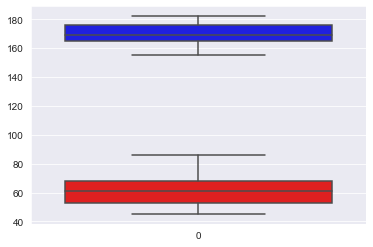

In [18]:
# Show a Boxplot for the height.
sns.boxplot(data=df['height'], color="blue")
sns.boxplot(data=df['weight'], color="red" )

#### 1.3. Covariance and Correlation:

Calculate the   covariance between  ``height`` and ``weight`` using ``cov`` function

In [22]:
# Covariance.
df["height"].cov(df["weight"])

61.790698529411785

Calculate the   correlation between  ``height`` and ``weight``.

In [23]:
# Correlation.
df["height"].corr(df["weight"])

0.6641815979588611

calculate the correlation between ``height`` and ``weight`` using the covariance between the two

In [26]:
# Calculate the correlation using the covariance.
# use the equation in the link : https://medium.com/analytics-vidhya/covariance-and-correlation-math-and-python-code-7cbef556baed
stdh= df['height'].std()
stdw= df['weight'].std()
corr = df["height"].cov(df["weight"]) / (stdh*stdw)
print (corr)

0.6641815979588611


#### 1.4. Visualization:

show the relationship between ``weight`` and ``height`` ( find the appropriate plot to showcase the correlation between two numerical variables)

<function matplotlib.pyplot.show(close=None, block=None)>

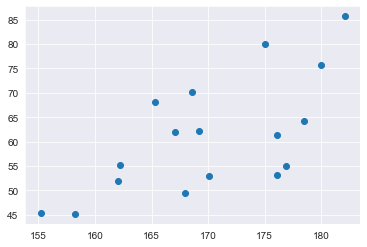

In [32]:
# Visually inspect the relationship between X and Y.
x= df['height']
y= df['weight']
plt.scatter(x,y)
plt.show

the goal of this last question is to seperate your dataset into male and female group. 
plot two overlapping scatter plots of these groups with different colors

**remark** : 

if you run the following code , you will get two different plots , find a way to mitigate this problem

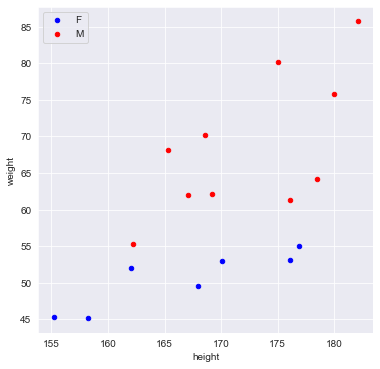

In [49]:
# Visually inspect the relationship between X and Y.
# Distinguish the gender by color.
color_dict = dict ({'M': 'red' , 'F' : 'blue'})
fig, ax = plt.subplots(figsize=(6, 6))
grouped = df.groupby('gender')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='height', y='weight', label=key, color=color_dict[key])
plt.show()

plt.show()